# Llamadas a Solvers usando or-tools

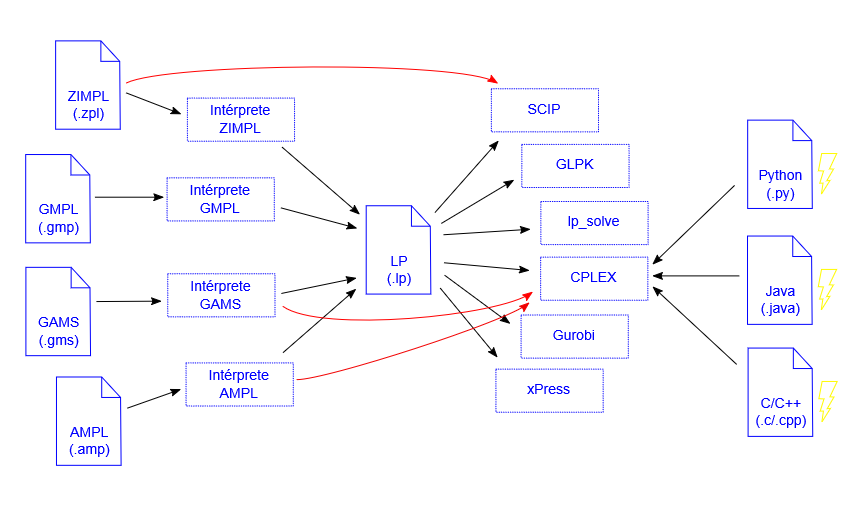


## Or-Tools

Es una interfaz desarrollada por google que implementa la comunicación con distintos tipos de solvers.

https://developers.google.com/optimization/introduction/python

Existen otros para python más especificos como: http://www.pyomo.org/

### Pasos a seguir

1 - Instalamos Ortools (si no lo tenemos ya instalado).

In [1]:
# pip install ortools

2 - Importamos las librerias necesarias.

In [1]:
import random
from ortools.linear_solver import pywraplp

3 - Creamos una instancia del solver que querramos, en este caso, SCIP.

In [2]:
# Crear un solver mip con SCIP de backend.
solver = pywraplp.Solver.CreateSolver('SCIP')

4 - Definimos los parámetros del problema.

In [3]:
n = 10
repeticiones = 3
peso_maximo_mochila = 150

5 - Creamos las variables enteras con el comando IntVar teniendo que ser, en este caso, mayores o iguales que 0.

$ X_i: $ Cantidad de unidades del objeto i que ponemos en la mochila.


In [4]:
infinity = solver.infinity()
x = {}
for j in range(n):
    x[j] = solver.IntVar(0, infinity, f"x_{j}")

print('Cantidad de variables: ', solver.NumVariables())

Cantidad de variables:  10


6 - Creamos items aleatorios con la libreria random (peso y valor).

In [6]:
pesos = []
valores = []

for j in range(n):
    variable_value = random.uniform(0, 1)
    valores.append(random.uniform(0, 1))
    variable_weight = random.uniform(10, 15)
    pesos.append(random.uniform(10, 15))
    print(f"La variable {x[j]}, vale {variable_value} y pesa {variable_weight}")
  

La variable x_0, vale 0.017350093762012686 y pesa 13.557142360884288
La variable x_1, vale 0.5835212754273452 y pesa 10.304800920804643
La variable x_2, vale 0.6739531371002716 y pesa 10.13405850212613
La variable x_3, vale 0.3039679451119719 y pesa 11.656138476872641
La variable x_4, vale 0.6925196836598497 y pesa 12.077670338792096
La variable x_5, vale 0.4320644617702517 y pesa 11.934401484058391
La variable x_6, vale 0.12623927424104053 y pesa 11.089842151977619
La variable x_7, vale 0.08673318211757197 y pesa 12.058754058594193
La variable x_8, vale 0.09922065221122234 y pesa 13.779070853536592
La variable x_9, vale 0.44574242960655475 y pesa 10.442006252752405


7 - Agregamos las restricción de no superar el máximo permitido de la mochila.

$$ \sum_{j=1}^{n} w_j x_i \le W $$

In [7]:
constraint_expr = [pesos[j]*x[j] for j in range(n)]
solver.Add(sum(constraint_expr) <= peso_maximo_mochila)

<ortools.linear_solver.pywraplp.Constraint; proxy of <Swig Object of type 'operations_research::MPConstraint *' at 0x105a09e60> >

8 - Limitamos las variables a un máximo de 3 items iguales. Esta restricción podría no existir, nosotros elegimos agregarla. 

In [8]:
for j in range(n):
  solver.Add(x[j] <= repeticiones)

9 - Definimos la función objetivo y determinamos el como queremos optimizar (minimización o maximización).

$$ max z = \sum_{j=1}^{n} v_j x_j $$


In [9]:

obj_expr = [valores[j]*x[j] for j in range(n)]

solver.Maximize(solver.Sum(obj_expr))

10 - Utilizamos el comando Solve para decirle al solver que optimice.

In [10]:
print(f'Solving with {solver.SolverVersion()}')
status = solver.Solve()

Solving with SCIP 8.0.4 [LP solver: Glop 9.8]


11 - Si alcanza el óptimo, printear las variables que lo alcanzan y el valor de la función objetivo. 

In [11]:
if status == pywraplp.Solver.OPTIMAL:
    print('Objective value =', solver.Objective().Value())
    for j in range(n):
        print(x[j].name(), ' = ', x[j].solution_value())
    print()
    print('Problem solved in %f milliseconds' % solver.wall_time())
    print('Problem solved in %d iterations' % solver.iterations())
    print('Problem solved in %d branch-and-bound nodes' % solver.nodes())
else:
    print('The problem does not have an optimal solution.')

Objective value = 8.785378671081764
x_0  =  3.0
x_1  =  0.0
x_2  =  0.0
x_3  =  0.0
x_4  =  3.0
x_5  =  3.0
x_6  =  0.0
x_7  =  3.0
x_8  =  0.0
x_9  =  0.0

Problem solved in 305154.000000 milliseconds
Problem solved in 1 iterations
Problem solved in 1 branch-and-bound nodes


### Ejercicio 1: nuevamente lot-sizing

Implementar el modelo en or-tools dada la siguiente sintaxis:

In [ ]:

set T := { 1 .. 5 };
set W := { 0 .. 5 };

# Demanda y costo de cada periodo
param d[T] := <1> 10, <2> 10, <3> 10, <4> 10, <5> 10;
param c[T] := <1> 8, <2> 9, <3> 7, <4> 11, <5> 12;

var x[T] >= 0;
var s[W] >= 0;

minimize fobj: sum <t> in T: (c[t] * x[t] + 1.5 * s[t]);

subto defstock: forall <t> in T:
   s[t] == s[t-1] + x[t] - d[t];

subto maxprod: forall <t> in T:
   x[t] <= 17;

subto maxstock: forall <t> in T:
   s[t] <= 12;

subto minstock: forall <t> in T:
   s[t] >= 4;

subto stockinicial: s[0] == 0;

In [2]:
from ortools.linear_solver import pywraplp

def main():
    solver = pywraplp.Solver.CreateSolver("SCIP")

    if not solver:
        return

    # Sets
    T = range(1, 6)
    W = range(6)

    # Parameters
    d = {1: 10, 2: 10, 3: 10, 4: 10, 5: 10}
    c = {1: 8, 2: 9, 3: 7, 4: 11, 5: 12}

    # Variables
    x = {}
    s = {}


    for j in T:
        x[j] = solver.IntVar(0, solver.infinity(), f"x_{j}")
    for j in W:
        s[j] = solver.IntVar(0, solver.infinity(), f"s_{j}")
    
    print("Number of variables =", solver.NumVariables())

    # Objective function
    obj_expr = [c[t]*x[t] + 1.5*s[t] for t in T]
    solver.Minimize(solver.Sum(obj_expr))
    
    # Constraints
    for t in T:
        solver.Add(s[t] == s[t-1]+x[t]-d[t] if t>0 else s[t] == x[t])
        solver.Add(x[t] <= 17)
        solver.Add(s[t] <= 12)
        solver.Add(s[t] >= 4)
    solver.Add(s[0] == 0)


    print("Number of constraints =", solver.NumConstraints())

    print(f"Solving with {solver.SolverVersion()}")
    status = solver.Solve()

    if status == pywraplp.Solver.OPTIMAL:
        print("Solution:")
        print(F"Objective value ={solver.Objective().Value()}")
        for t in T:
            print()
        for w in W:
            print()
    else:
        print("The problem does not have an optimal solution.")

    print("\nAdvanced usage:")
    print(f"Problem solved in {solver.wall_time():d} milliseconds")
    print(f"Problem solved in {solver.iterations():d} iterations")
    print(f"Problem solved in {solver.nodes():d} branch-and-bound nodes")

if __name__ == "__main__":
    main()

Number of variables = 11
Number of constraints = 21
Solving with SCIP 8.0.4 [LP solver: Glop 9.8]
Solution:
Objective value =514.5












Advanced usage:
Problem solved in 5 milliseconds
Problem solved in 0 iterations
Problem solved in 0 branch-and-bound nodes


### Ejercicio 2: fixture

Implementar el modelo en or-tools dada la siguiente sintaxis:

In [ ]:

# Equipos
set E := { "RIV", "BOC", "IND", "RAC", "SLO", "DYJ", "ATU", "VEL", "HUR", "UNI", "ALD", "TAL", "BAN",
           "LAN", "GOD", "NOB", "TIG", "EST", "CEN", "COL", "SAN", "GYE", "SMT", "PAT", "BEL", "ARG" };

# Fechas
set F := { 1 .. 25 };

# Variables de partidos
var x[E*E*F] binary;

# Cada equipo juega un partido por fecha
subto unpartido: forall <i,f> in E*F:
    sum <j> in E: (x[i,j,f] + x[j,i,f]) == 1;

# Cada partido se juega una vez, en una de sus dos localias
subto singleround: forall <i,j> in E*E with i != j:
    sum <f> in F: (x[i,j,f] + x[j,i,f]) == 1;

# No se juega contra si mismo
subto anuladas: forall <i,f> in E*F:
    x[i,i,f] == 0;

# Balance de partidos de local y visitante
subto locales: forall <i> in E:
    sum <j,f> in E*F: x[i,j,f] <= 13;

subto visitantes: forall <i> in E:
    sum <j,f> in E*F: x[j,i,f] <= 13;

# No se juegan tres partidos seguidos de local
subto runlocal: forall <i,f> in E*F with f < 24:
    sum <j> in E: (x[i,j,f] + x[i,j,f+1] + x[i,j,f+2]) <= 2;

# No se juegan tres partidos seguidos de visitante
subto runvisitante: forall <i,f> in E*F with f < 24:
    sum <j> in E: (x[j,i,f] + x[j,i,f+1] + x[j,i,f+2]) <= 2;

In [9]:
from ortools.linear_solver import pywraplp

def main():
    # solver = pywraplp.Solver.CreateSolver("SCIP")
    solver = pywraplp.Solver.CreateSolver("SCIP")

    if not solver:
        return

    # Equipos
    E = ["RIV", "BOC", "IND", "RAC", "SLO", "DYJ", "ATU", "VEL", "HUR", "UNI", "ALD", "TAL", "BAN",
         "LAN", "GOD", "NOB", "TIG", "EST", "CEN", "COL", "SAN", "GYE", "SMT", "PAT", "BEL", "ARG"]
    F = range(1, 26)

    # Variables
    x = {(i, j, f): solver.BoolVar(f'x[{i},{j},{f}]') for i in E for j in E for f in F}

    print("Number of variables =", solver.NumVariables())

    # Restricciones

    # Cada equipo juega un partido por fecha
    for i in E:
        for f in F:
            solver.Add(sum(x[i, j, f] + x[j, i, f] for j in E) == 1)

    # Cada partido se juega una vez, en una de sus dos localías
    for i in E:
        for j in E:
            if i != j:
                solver.Add(sum(x[i, j, f] + x[j, i, f] for f in F) == 1)


    # No se juega contra si mismo
    for i in E:
        for f in F:
            solver.Add(x[i,i,f] == 0)
    
    # Balance de partidos de local y visitante
    for i in E:
        for j in E:
                solver.Add(sum(x[i,j,f] for f in F) <= 13)

    
    # No se juegan tres partidos seguidos de local
    for i in E:
        solver.Add(sum(x[i,j,f] + x[i,j,f+1] + x[i,j,f+2] for f in range(1,24)) <= 2)
    
    # No se juegan tres partidos seguidos de visitante
    for i in E:
        solver.Add(sum(x[j,i,f] + x[j,i,f+1] + x[j,i,f+2] for f in range(1,24)) <= 2)

    print("Number of constraints =", solver.NumConstraints())

    # Resolución del modelo
    print(f"Solving with {solver.SolverVersion()}")
    status = solver.Solve()

    if status == pywraplp.Solver.OPTIMAL:
        print("Solution:")
        for i, j, f in x:
            if x[i, j, f].solution_value() == 1:
                print(f"Match between {i} and {j} on date {f}")
    else:
        print("The problem does not have an optimal solution.")

    print("\nAdvanced usage:")
    print(f"Problem solved in {solver.wall_time():d} milliseconds")
    print(f"Problem solved in {solver.iterations():d} iterations")
    print(f"Problem solved in {solver.nodes():d} branch-and-bound nodes")

if __name__ == "__main__":
    main()

Number of variables = 16900
Number of constraints = 2678
Solving with SCIP 8.0.4 [LP solver: Glop 9.8]
The problem does not have an optimal solution.

Advanced usage:
Problem solved in 794 milliseconds
Problem solved in 0 iterations
Problem solved in 0 branch-and-bound nodes


In [4]:
def read_data(i,j):
    with open("datosraw.dat", "r") as f:
        lines = f.readlines()
        data_ij = int(lines[j - 1].split()[i - 1])
    return data_ij


In [ ]:
set I := {1..5};
st J := {1..24};
set W := {0 .. 24};

param d[J*I] := read "datosraw.dat" as "n+";

var x[I*J] integer;
var y[I*J] integer;
var s[I*W] integer;
var z[I*J] integer;
var b[I*J] binary;
var m integer;

minimize fobj: m;

subto lotes: forall <i,j> in I*J: y[i,j] <= 12;

subto ligarlotes: forall <i,j> in I*J: x[i,j] - y[i,j] * 10 == 0;

subto stockinicial: forall <i> in I: s[i,0] == 0;

subto defstock: forall <i,j> in I*J: 
    s[i,j] == s[i,j-1] + x[i,j] + z[i,j] - d[j,i];

subto stockmax: forall <j> in J: (sum <i> in I: s[i,j]) <= 900;

subto mincap: forall <j> in J: (sum <i> in I: s[i,j]) <= m;

subto stocknoneg: forall <i,j> in I*J: s[i,j] >=0;

subto produccionnoneg: forall <i,j> in I*J: x[i,j] >=0;

subto tercerizacionnoneg: forall <i,j> in I*J: z[i,j] >=0;

subto maxproduccion: forall <j> in J: (sum <i> in I: x[i,j]) <= 300;

subto maxtercerizacion: forall <j> in J: (sum <i> in I: z[i,j]) <= 200;

subto minz: forall <i,j> in I*J: z[i,j] - 20 * b[i,j] >= 0;

subto maxz: forall <i,j> in I*J: z[i,j] - 200 * b[i,j] <= 0;

In [ ]:
set I := {1..5};
set J := {1..24};
set W := {0 .. 24};

param d[J*I] := read "datosraw.dat" as "n+";

var x[I*J] integer;
var y[I*J] integer;
var s[I*W] integer;
var z[I*J] integer;
var b[I*J] binary;

minimize fobj: 370 * (sum<i,j> in I*J: x[i,j]) + 540 * (sum<i,j> in I*J: z[i,j]);

subto lotes: forall <i,j> in I*J: y[i,j] <= 12;

subto ligarlotes: forall <i,j> in I*J: x[i,j] - y[i,j] * 10 == 0;

subto stockinicial: forall <i> in I: s[i,0] == 0;

subto defstock: forall <i,j> in I*J: 
    s[i,j] == s[i,j-1] + x[i,j] + z[i,j] - d[j,i];

subto stockmax: forall <j> in J: (sum <i> in I: s[i,j]) <= 900;

subto stocknoneg: forall <i,j> in I*J: s[i,j] >=0;

subto produccionnoneg: forall <i,j> in I*J: x[i,j] >=0;

subto tercerizacionnoneg: forall <i,j> in I*J: z[i,j] >=0;

subto maxproduccion: forall <j> in J: (sum <i> in I: x[i,j]) <= 300;

subto maxtercerizacion: forall <j> in J: (sum <i> in I: z[i,j]) <= 200;

subto minz: forall <i,j> in I*J: z[i,j] - 20 * b[i,j] >= 0;
subto maxz: forall <i,j> in I*J: z[i,j] - 200 * b[i,j] <= 0;

In [5]:


I = range(1, 6)
J = range(1, 24)
W = range(25)

d = {(i, j): read_data(i, j) for i in I for j in J}

solver = pywraplp.Solver.CreateSolver('SCIP')

def main():
    if not solver:
        return
    
    # Variables
    x = {(i,j): solver.IntVar(0,solver.infinity(),f"x_{i}_{j}") for i in I for j in J}
    y = {(i,j): solver.IntVar(0,12,f"y_{i}_{j}") for i in I for j in J}
    s = {(i,j): solver.intVar(0,solver.infinity(), f"s_{i}_{w}") for i in I for w in W}

    print("Number of variables =", solver.NumVariables())

    obj_expr = solver.Sum(370*x[i,j] for i in I for j in J)
    solver.Minimize(obj_expr)

    # Constraints

    # Atar x con y lotes con cantidades:
    for i in I:
        for j in J:
            solver.Add(x[i,j] == 10*y[i,j])
    # Cada almacen tiene 900 de capacidad máxima
    for j in J:
        solver.Add(solver.Sum([s[i,j] for i in I] <= 900))

    for i in I:
        solver.Add(s[i,0] == 0)

    #Atar stock
    for i in I:
        for j in J:
            solver.Add(s[i,j] == s[i,j-1] + x[i,j] - d[i,j])
    
    




In [6]:
d

{(1, 1): 20,
 (1, 2): 25,
 (1, 3): 30,
 (1, 4): 40,
 (1, 5): 60,
 (1, 6): 100,
 (1, 7): 180,
 (1, 8): 210,
 (1, 9): 150,
 (1, 10): 60,
 (1, 11): 30,
 (1, 12): 20,
 (1, 13): 20,
 (1, 14): 25,
 (1, 15): 30,
 (1, 16): 40,
 (1, 17): 60,
 (1, 18): 100,
 (1, 19): 180,
 (1, 20): 210,
 (1, 21): 150,
 (1, 22): 60,
 (1, 23): 30,
 (2, 1): 30,
 (2, 2): 40,
 (2, 3): 40,
 (2, 4): 45,
 (2, 5): 90,
 (2, 6): 140,
 (2, 7): 210,
 (2, 8): 250,
 (2, 9): 170,
 (2, 10): 60,
 (2, 11): 40,
 (2, 12): 25,
 (2, 13): 30,
 (2, 14): 40,
 (2, 15): 40,
 (2, 16): 45,
 (2, 17): 90,
 (2, 18): 140,
 (2, 19): 210,
 (2, 20): 250,
 (2, 21): 170,
 (2, 22): 60,
 (2, 23): 40,
 (3, 1): 10,
 (3, 2): 15,
 (3, 3): 15,
 (3, 4): 20,
 (3, 5): 30,
 (3, 6): 50,
 (3, 7): 90,
 (3, 8): 105,
 (3, 9): 75,
 (3, 10): 30,
 (3, 11): 15,
 (3, 12): 10,
 (3, 13): 10,
 (3, 14): 15,
 (3, 15): 15,
 (3, 16): 20,
 (3, 17): 30,
 (3, 18): 50,
 (3, 19): 90,
 (3, 20): 105,
 (3, 21): 75,
 (3, 22): 30,
 (3, 23): 15,
 (4, 1): 15,
 (4, 2): 20,
 (4, 3): 20,
 (4,

In [ ]:
set E := { 1 .. 8 };
set H := { 0 .. 119 };

param d[H] := read "demanda.dat" as "<1n> 2n";

var x[E] binary;
var y[E*H] binary;
var z[E*H] binary;

minimize fobj: sum <i> in E: x[i] - 0.01 * sum <i,h> in E*H: z[i,h];

subto inicios: forall <i> in E:
    sum <h> in H: y[i,h] == 5 * x[i];

subto descanso: forall <i,h> in E*H with h >= 19:
    sum <hp> in {h-19..h}: y[i,hp] <= 1;

subto atencion1: forall <h> in H with h < 7:
    25 * sum <i,hp> in E*{0..h}: y[i,hp] >= d[h];

subto atencion2: forall <h> in H with h >= 7:
    25 * sum <i,hp> in E*{h-7..h}: y[i,hp] >= d[h];

subto ligar1: forall <i,h> in E*H with h >= 24:
    z[i,h] <= y[i,h-24];

subto ligar2: forall <i,h> in E*H with h >= 24:
    z[i,h] <= y[i,h];
 
subto ceros: forall <i,h> in E*H with h < 24:
    z[i,h] == 0;%  

In [ ]:
# Conjunto de personas
set P := { read "personal.dat" as "<1s>" skip 1 };

# Sueldo y coeficiente de cada persona
param s[P] := read "personal.dat" as "<1s> 2n" skip 1;
param q[P] := read "personal.dat" as "<1s> 3n" skip 1;

# x[i] = 1 si se selecciona la persona i
var x[P] binary;
var sueldo;

# Maximizamos el coeficiente total del equipo
maximize fobj: sum <i> in P: q[i] * x[i];

# Seleccionamos 11 personas
subto cantidad: sum <i> in P: x[i] == 11;

# Restriccion de presupuesto
subto presup: sum <i> in P: s[i] * x[i] <= 50000;